In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starbucks-stock-price-dataset/Starbucks Dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

2024-05-28 05:35:11.494760: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-28 05:35:11.494884: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-28 05:35:11.647086: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import warnings

# Mengabaikan semua peringatan
warnings.filterwarnings("ignore")

In [4]:
path = '/kaggle/input/starbucks-stock-price-dataset/Starbucks Dataset.csv'

In [5]:
df = pd.read_csv(path)

# Data Wrangling

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1992-06-26,0.328125,0.347656,0.320313,0.335938,0.260703,224358400
1,1992-06-29,0.339844,0.367188,0.332031,0.359375,0.278891,58732800
2,1992-06-30,0.367188,0.371094,0.343750,0.347656,0.269797,34777600
3,1992-07-01,0.351563,0.359375,0.339844,0.355469,0.275860,18316800
4,1992-07-02,0.359375,0.359375,0.347656,0.355469,0.275860,13996800
...,...,...,...,...,...,...,...
8031,2024-05-17,75.269997,78.000000,74.919998,77.849998,77.849998,14436500
8032,2024-05-20,77.680000,78.320000,76.709999,77.540001,77.540001,11183800
8033,2024-05-21,77.559998,78.220001,77.500000,77.720001,77.720001,8916600
8034,2024-05-22,77.699997,81.019997,77.440002,80.720001,80.720001,22063400


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8036 non-null   object 
 1   Open       8036 non-null   float64
 2   High       8036 non-null   float64
 3   Low        8036 non-null   float64
 4   Close      8036 non-null   float64
 5   Adj Close  8036 non-null   float64
 6   Volume     8036 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 439.6+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Years'] = df['Date'].dt.year

In [10]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Years        0
dtype: int64

In [11]:
print('duplicate: ', df.duplicated().sum())

duplicate:  0


In [12]:
# df.describe()

# EDA

In [13]:
df.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Years
count,8036,8036.000000,8036.000000,8036.000000,8036.000000,8036.000000,8.036000e+03,8036.000000
mean,2008-06-06 01:47:20.219014400,30.054280,30.351487,29.751322,30.058857,26.674025,1.470459e+07,2007.928571
min,1992-06-26 00:00:00,0.328125,0.347656,0.320313,0.335938,0.260703,1.504000e+06,1992.000000
25%,2000-06-08 18:00:00,4.392031,4.531250,4.304922,4.399610,3.414300,7.817750e+06,2000.000000
50%,2008-06-07 12:00:00,13.325000,13.493750,13.150000,13.330000,10.352452,1.169815e+07,2008.000000
75%,2016-05-31 06:00:00,55.250000,55.722501,54.852499,55.267499,47.464829,1.778795e+07,2016.000000
max,2024-05-23 00:00:00,126.080002,126.320000,124.809998,126.059998,118.010414,5.855088e+08,2024.000000
std,NaN,33.615577,33.906613,33.314569,33.615911,31.728090,1.340021e+07,9.224929


In [14]:
df.Date.is_unique

True

In [15]:
sum_volume = df.groupby('Years').Volume.sum().sort_values(ascending=False).reset_index()
sum_volume.head()

,Years,Volume
0,2008,7512996800
1,2007,6254705200
2,2009,6177217800
3,1999,5409938400
4,1995,5355268800


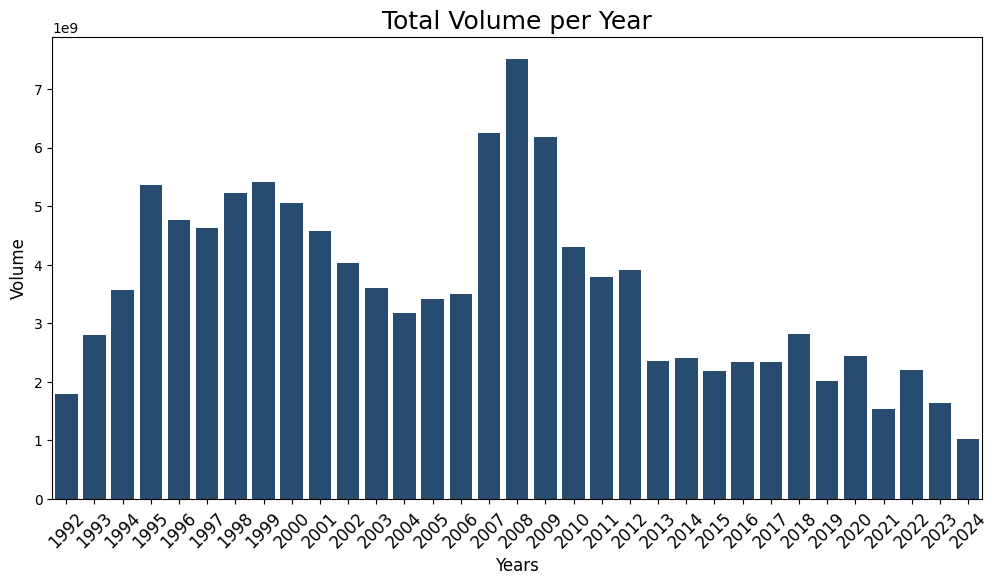

In [16]:
# Membuat plot
fig, ax = plt.subplots(figsize=(12, 6))

custom_palette = ['#1C4C7C']
# costum_palette = sns.color_palette("Blues")

# Plot bar horizontal untuk semua data
sns.barplot(x='Years', y='Volume', data=sum_volume, color=custom_palette[0], ax=ax)
ax.set_ylabel('Volume', fontsize=12)
ax.set_xlabel('Years', fontsize=12)
ax.set_title("Total Volume per Year", loc='center', fontsize=18)
ax.tick_params(axis='x', labelsize=12, rotation=45)

# Menampilkan plot
plt.show()

In [17]:
mean_price = df.groupby('Years')['Adj Close'].agg('mean').sort_values(ascending=False).reset_index()
mean_price.head()

,Years,Adj Close
0,2021,104.932065
1,2023,98.429213
2,2024,88.094702
3,2022,83.722111
4,2020,76.235135


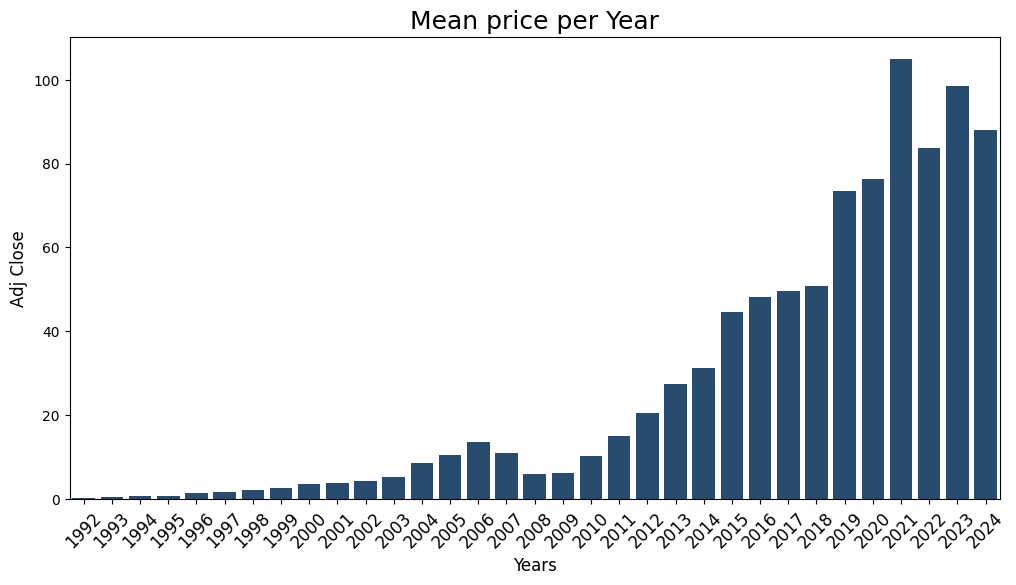

In [18]:
# Membuat plot
fig, ax = plt.subplots(figsize=(12, 6))

custom_palette = ['#1C4C7C']
# costum_palette = sns.color_palette("Blues")

# Plot bar horizontal untuk semua data
sns.barplot(x='Years', y='Adj Close', data=mean_price, color=custom_palette[0], ax=ax)
ax.set_ylabel('Adj Close', fontsize=12)
ax.set_xlabel('Years', fontsize=12)
ax.set_title("Mean price per Year", loc='center', fontsize=18)
ax.tick_params(axis='x', labelsize=12, rotation=45)

# Menampilkan plot
plt.show()

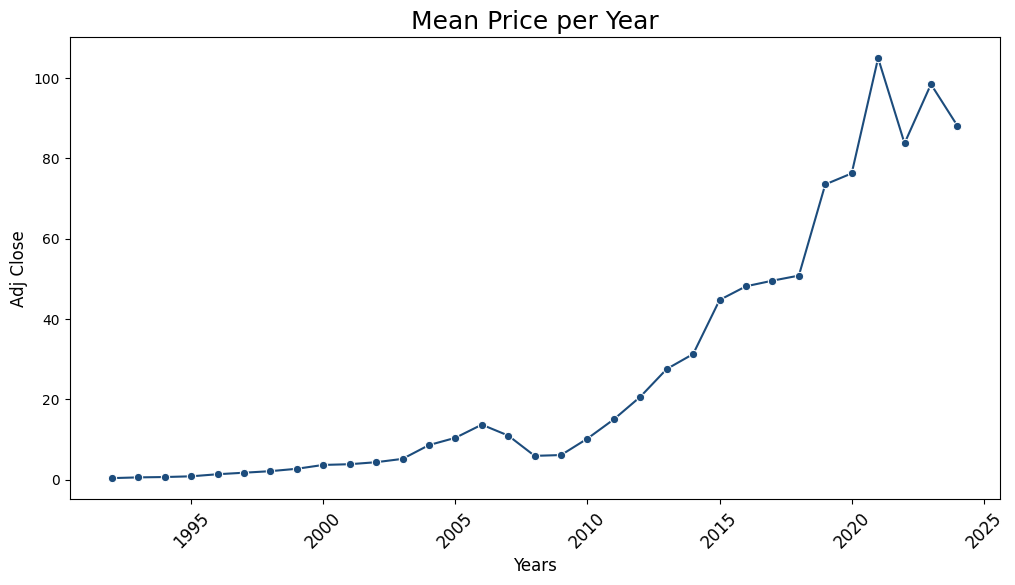

In [19]:
# Membuat plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot line untuk rata-rata harga per tahun
sns.lineplot(x='Years', y='Adj Close', data=mean_price, marker='o', color='#1C4C7C', ax=ax)
ax.set_ylabel('Adj Close', fontsize=12)
ax.set_xlabel('Years', fontsize=12)
ax.set_title("Mean Price per Year", loc='center', fontsize=18)
ax.tick_params(axis='x', labelsize=12, rotation=45)

# Menampilkan plot
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8036 non-null   datetime64[ns]
 1   Open       8036 non-null   float64       
 2   High       8036 non-null   float64       
 3   Low        8036 non-null   float64       
 4   Close      8036 non-null   float64       
 5   Adj Close  8036 non-null   float64       
 6   Volume     8036 non-null   int64         
 7   Years      8036 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1)
memory usage: 471.0 KB


In [21]:
df_corr = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Menyortir nilai korelasi secara menurun
df_corr_sorted = df_corr.sort_values(by='Adj Close', ascending=False)

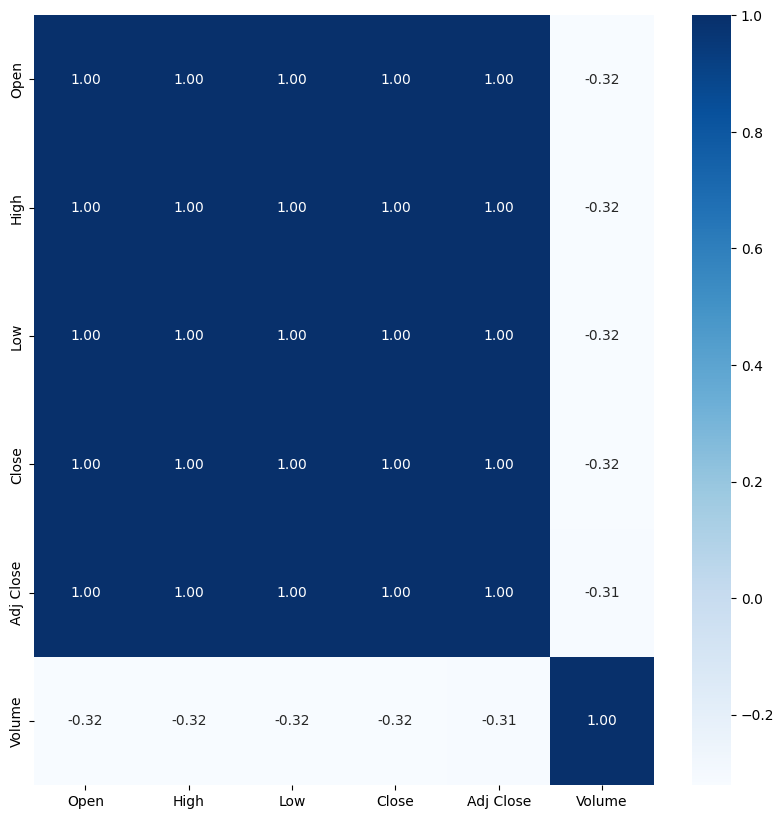

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, fmt=".2f", annot=True, cmap="Blues")
plt.show()

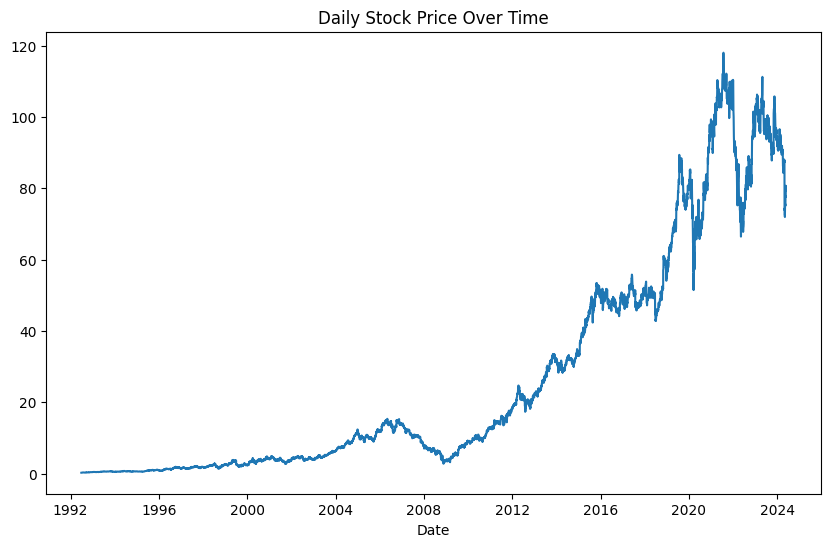

In [23]:
# Mengambil nilai time_step dan price dari DataFrame
time_step = df['Date'].values
price = df['Adj Close'].values

# Plot series
plt.figure(figsize=(10, 6))
plt.plot(time_step, price)
plt.xlabel('Date')
#plt.ylabel('Daily Mean Total Price Stock')
plt.title('Daily Stock Price Over Time')
# plt.grid(True)
plt.show()

## Split dataset

In [24]:
df.shape

(8036, 8)

In [25]:
split_time = 7000

In [26]:
# train data
time_train = time_step[:split_time]
x_train = price[:split_time]

# validation data
time_valid = time_step[split_time:]
x_valid = price[split_time:]

In [27]:
def plot_series(time, series):
    plt.figure(figsize=(10, 6))
    plt.plot(time, series)
    plt.xlabel('Date')
    plt.ylabel('Daily Total Price Stock')
    plt.title('Daily Price Stock Over Time')
    plt.show()

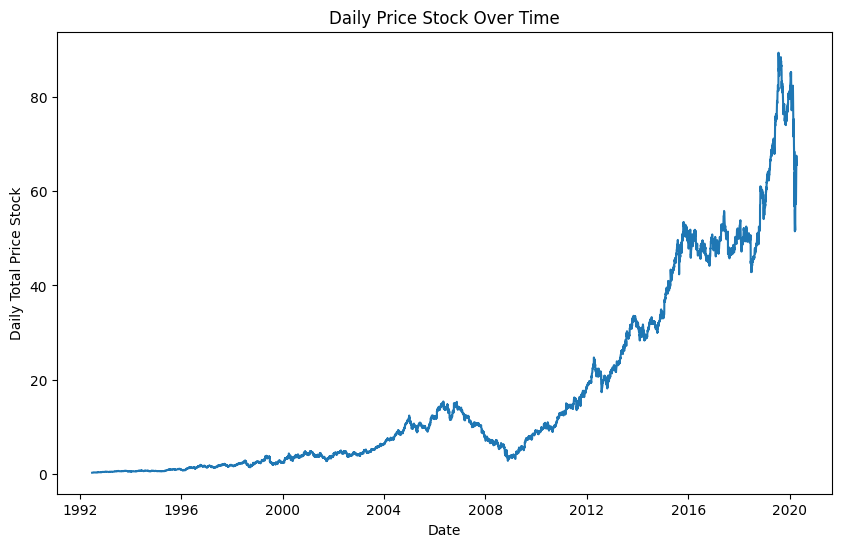

In [28]:
# plot the train set
plot_series(time_train, x_train)

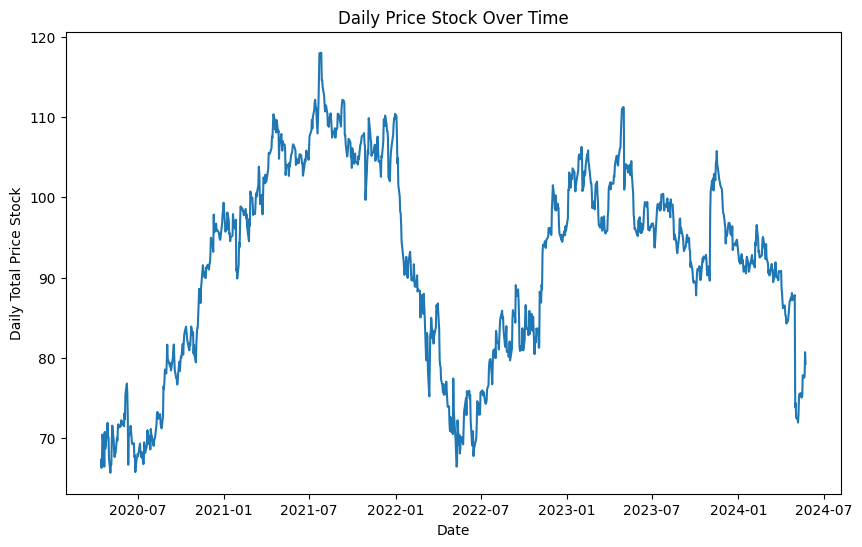

In [29]:
# plot the validation set
plot_series(time_valid, x_valid)

# Naive Forecast

In [30]:
def plot_series(time, series, start=0, end=None):
    plt.figure(figsize=(10, 6))
    if isinstance(series, tuple):
        for s in series:
            plt.plot(time[start:end], s[start:end])
    else:
        plt.plot(time[start:end], series[start:end])
    plt.xlabel('Date')
    plt.ylabel('Daily Total Price Stock')
    plt.title('Daily Price Stock Over Time')
    plt.show()

In [31]:
# Generate the naive forecast
naive_forecast = price[split_time-1: -1]

# Define time step
time_step = 300

# Print values
print(f'ground truth at time step {time_step}: {x_valid[time_step]}')
print(f'prediction at time step {time_step + 1}: {naive_forecast[time_step + 1]}')

ground truth at time step 300: 104.707794
prediction at time step 301: 104.707794


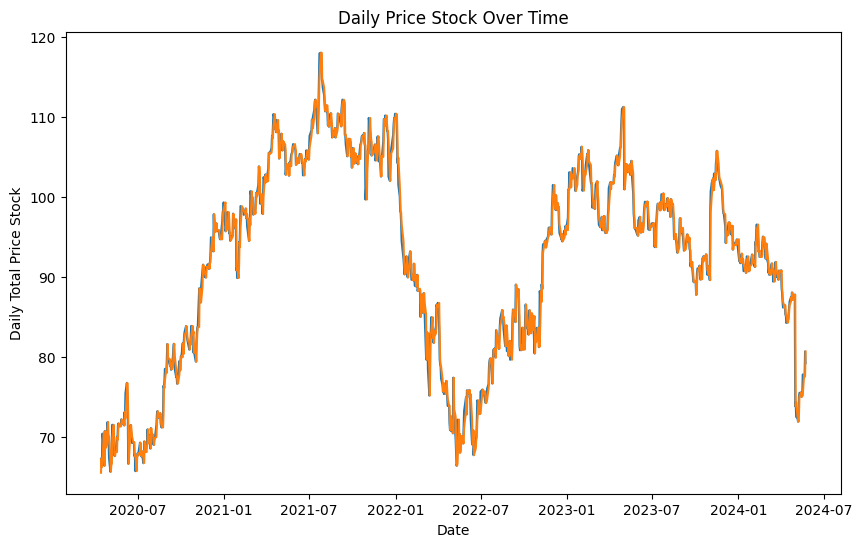

In [32]:
plot_series(time_valid, (x_valid, naive_forecast))

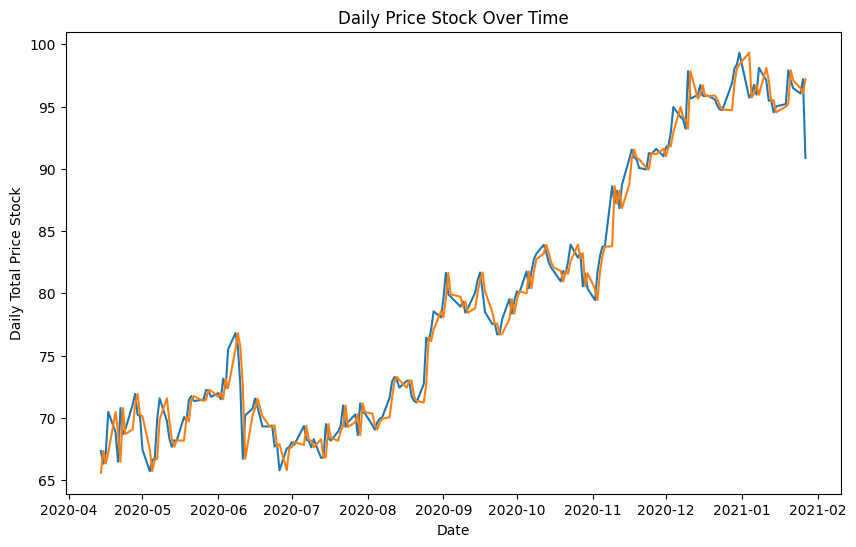

In [33]:
# Zooming in
plot_series(time_valid, (x_valid, naive_forecast), start=0, end=200)

In [34]:
print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

2.46803360861043
1.0945905984555984


# Moving Average

In [35]:
def moving_average_forecast(series, window_size):
    """Generates a moving average forecast

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to compute the average for

    Returns:
      forecast (array of float) - the moving average forecast
    """

    # Initialize a list
    forecast = []

    # Compute the moving average based on the window size
    for time in range(len(series) - window_size):
      forecast.append(series[time:time + window_size].mean())

    # Convert to a numpy array
    forecast = np.array(forecast)

    return forecast

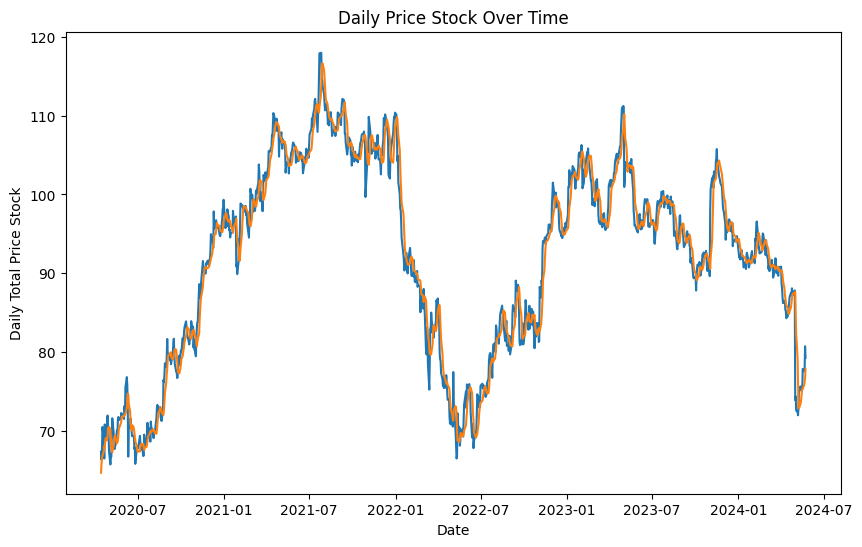

In [36]:
# Generate the moving average forecast
moving_avg = moving_average_forecast(price, 5)[split_time - 5:]

# Plot the results
plot_series(time_valid, (x_valid, moving_avg))

In [37]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

5.074048366246877
1.6811938241312738
